In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import glob

In [2]:
results = [pd.read_csv(path) for path in glob.glob("./logs/*csv")]
results = pd.concat(results)
# Clean dataframe
results = results.apply(lambda x: x.apply(lambda y: y.split(' ')[1][:-1]))
results

,eeg_feature,model,hidden_channels,window_size,batch_size,learning_rate,dropout_rate,weight_decay,activation_funct,number_train_samples,...,mean_val_loss,val_acc,val_f1,val_prec,val_reca,val_roc,pytorch_total_params,train_time,best_epoch,train_samples
0,'psd','GraphConv',64,1.5,32,0.0005,0.25,0.0,'relu',1,...,2.599621214866638,0.9434375,0.9410534644448698,0.947955099238929,0.9434374999999999,0.9983463709677419,10372,1311.7614047527313,579,'1176/160
1,'psd','GraphConv',128,1.5,32,0.0005,0.25,0.0,'relu',1,...,2.7142911887168886,0.83875,0.8199612515265401,0.8321050169012006,0.83875,0.9894197580645161,20676,1242.713565826416,483,'490/160
2,'psd','GraphConv',256,1.5,32,0.0005,0.25,0.0,'relu',1,...,2.6510622572898863,0.8825,0.8685653299865771,0.8915774893989632,0.8825,0.9896975806451613,41284,1898.1972122192383,748,'945/160
3,'psd','GraphConv',512,1.5,32,0.0005,0.25,0.0,'relu',1,...,2.6312558698654174,0.90875,0.9009069388136036,0.9219378120992278,0.90875,0.9975790322580644,82500,3338.10170006752,1390,'65/160
4,'psd','GraphConv',1024,1.5,32,0.0005,0.25,0.0,'relu',1,...,2.6141723656654356,0.9209375,0.9121957411731181,0.9256944008532217,0.9209375,0.9974690524193548,164932,2262.1220359802246,952,'383/160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19,'psd','CNN',128,1.0,32,0.0005,0.25,0.0,'relu',8,...,2.529776487350464,0.991875,0.9919428235300275,0.9922730520944698,0.9918750000000001,0.9999556451612903,8357,732.8557822704315,354,'257/240
20,'psd','CNN',256,1.0,32,0.0005,0.25,0.0,'relu',8,...,2.5342871570587158,0.988125,0.9879678752120118,0.9882933477568182,0.9881250000000001,0.9998358870967743,16677,884.2453246116638,351,'2292/240
21,'psd','CNN',512,1.0,32,0.0005,0.25,0.0,'relu',8,...,2.534694483280182,0.9875,0.9873976326500828,0.9877073309211143,0.9875,0.9999316532258065,33317,771.7546689510345,346,'419/240
22,'psd','CNN',1024,1.0,32,0.0005,0.25,0.0,'relu',8,...,2.5373122239112855,0.985625,0.9855250877793399,0.9859507072209267,0.985625,0.9999056451612902,66597,612.954628944397,297,'2314/240


In [3]:
def get_line(header, values):
    n_rows = 3
    n_cols = 10
    rows = [1,2,1,3,1,3,1,2,1,1]
    val_i = 0

    latex_line = '\\multirow{ 3}{*}{' + header + '}'
    for row in range(n_rows):
        for col in range(n_cols):
            latex_line += '& '
            if row == 0 or row+1 <= rows[col]:
                latex_line += str(values[val_i]) + ' '
                val_i+=1
                
            else:
                latex_line += ''
        latex_line += '\\\\'
    latex_line += '\\hline'
    return latex_line
print(get_line('LR',list(range(16))))

\multirow{ 3}{*}{LR}& 0 & 1 & 2 & 3 & 4 & 5 & 6 & 7 & 8 & 9 \\& & 10 & & 11 & & 12 & & 13 & & \\& & & & 14 & & 15 & & & & \\\hline


In [4]:
sample_nts = [1,2,1,4,2,8,2,8,8,8,1,2,4,4,1,2]
sample_ws = [.5, .5, 1.5, .5, 1.5, .5, 1.5, 1, 1.5, 2,1,1,1,2,2,2]

In [5]:
# Title
print(get_line('Model',[f'{nts}-{ws}s' for (nts,ws) in zip(sample_nts,sample_ws)]))

\multirow{ 3}{*}{Model}& 1-0.5s & 2-0.5s & 1-1.5s & 4-0.5s & 2-1.5s & 8-0.5s & 2-1.5s & 8-1s & 8-1.5s & 8-2s \\& & 1-1s & & 2-1s & & 4-1s & & 4-2s & & \\& & & & 1-2s & & 2-2s & & & & \\\hline


In [6]:
def get_results_for_model(model):
    res = []
    for (nts,ws) in zip(sample_nts,sample_ws):
        model_results = results[(results['model'] == f'\'{model}\'') & (results['window_size'].astype(float) == ws) & (results['number_train_samples'].astype(int)==nts)].sort_values('test_acc',ascending=False)
        res.append(str(model_results['test_acc'].to_numpy()[0])[:5])
    return res

In [7]:
models = ['LR','MLP','CNN','GraphConv']
for model in models:
    print(get_line(model,get_results_for_model(model)))

\multirow{ 3}{*}{LR}& 0.866 & 0.957 & 0.927 & 0.978 & 0.983 & 0.988 & 0.983 & 0.996 & 0.997 & 0.997 \\& & 0.937 & & 0.975 & & 0.991 & & 0.997 & & \\& & & & 0.962 & & 0.990 & & & & \\\hline
\multirow{ 3}{*}{MLP}& 0.915 & 0.970 & 0.975 & 0.989 & 0.993 & 0.992 & 0.993 & 0.997 & 0.998 & 0.998 \\& & 0.958 & & 0.987 & & 0.995 & & 0.997 & & \\& & & & 0.986 & & 0.994 & & & & \\\hline
\multirow{ 3}{*}{CNN}& 0.912 & 0.954 & 0.904 & 0.976 & 0.977 & 0.984 & 0.977 & 0.997 & 0.997 & 0.996 \\& & 0.938 & & 0.966 & & 0.993 & & 0.996 & & \\& & & & 0.963 & & 0.980 & & & & \\\hline
\multirow{ 3}{*}{GraphConv}& 0.854 & 0.929 & 0.939 & 0.965 & 0.972 & 0.985 & 0.972 & 0.991 & 0.994 & 0.997 \\& & 0.924 & & 0.968 & & 0.980 & & 0.991 & & \\& & & & 0.961 & & 0.980 & & & & \\\hline


In [6]:
results05 = results[(results['window_size'].astype(float) == .5) & (results['number_train_samples'].astype(int)==1)].sort_values('test_acc',ascending=False).reset_index()
for model in models:
    print(model,results05[results05['model'] == f'\'{model}\'']['test_acc'].to_numpy()[0])

MLP 0.9151282187699511
CNN 0.9129469035965099
GraphConv 0.854610023409236
LR 0.8663279421153437


In [7]:
results05 = results[(results['window_size'].astype(float) == 1) & (results['number_train_samples'].astype(int)==1)].sort_values('test_acc',ascending=False).reset_index()
for model in models:
    print(model,results05[results05['model'] == f'\'{model}\'']['test_acc'].to_numpy()[0])

MLP 0.958011635493693
CNN 0.9384379077859939
GraphConv 0.92442366246194
LR 0.9379077859939104


In [33]:
results05 = results[(results['window_size'].astype(float) == .5) & (results['number_train_samples'].astype(int)==2)].sort_values('test_acc',ascending=False).reset_index()
for model in models:
    print(model,results05[results05['model'] == f'\'{model}\'']['test_acc'].to_numpy()[0])

MLP 0.9705526287782035
CNN 0.9549874946785867
GraphConv 0.9292185504469987
LR 0.957847754363559


In [36]:
results05 = results[(results['window_size'].astype(float) == 1.5) & (results['number_train_samples'].astype(int)==1)].sort_values('test_acc',ascending=False).reset_index()
for model in models:
    print(model,results05[results05['model'] == f'\'{model}\'']['test_acc'].to_numpy()[0])

MLP 0.975712975316878
CNN 0.9041444296197465
GraphConv 0.9391677785190127
LR 0.9275975650433622


In [37]:
results05 = results[(results['window_size'].astype(float) == 2) & (results['number_train_samples'].astype(int)==1)].sort_values('test_acc',ascending=False).reset_index()
for model in models:
    print(model,results05[results05['model'] == f'\'{model}\'']['test_acc'].to_numpy()[0])

MLP 0.9865502729754322
CNN 0.9638307552320291
GraphConv 0.9616696997270245
LR 0.9620962238398544


In [39]:
results05 = results[(results['window_size'].astype(float) == .5) & (results['number_train_samples'].astype(int)==4)].sort_values('test_acc',ascending=False).reset_index()
for model in models:
    print(model,results05[results05['model'] == f'\'{model}\'']['test_acc'].to_numpy()[0])

MLP 0.9894191865417377
CNN 0.9764626810051107
GraphConv 0.9478013202725724
LR 0.978645389693356


In [40]:
results05 = results[(results['window_size'].astype(float) == 1.5) & (results['number_train_samples'].astype(int)==2)].sort_values('test_acc',ascending=False).reset_index()
for model in models:
    print(model,results05[results05['model'] == f'\'{model}\'']['test_acc'].to_numpy()[0])

MLP 0.9933661548731643
CNN 0.9778663217623498
GraphConv 0.9720877837116155
LR 0.9835405540720962


In [41]:
results05 = results[(results['window_size'].astype(float) == 2) & (results['number_train_samples'].astype(int)==2)].sort_values('test_acc',ascending=False).reset_index()
for model in models:
    print(model,results05[results05['model'] == f'\'{model}\'']['test_acc'].to_numpy()[0])

MLP 0.9947347449908925
CNN 0.9809596994535519
GraphConv 0.9805327868852459
LR 0.9904940801457195


In [42]:
results05 = results[(results['window_size'].astype(float) == 1) & (results['number_train_samples'].astype(int)==4)].sort_values('test_acc',ascending=False).reset_index()
for model in models:
    print(model,results05[results05['model'] == f'\'{model}\'']['test_acc'].to_numpy()[0])

MLP 0.9951954486062717
CNN 0.9931130226480837
GraphConv 0.9801829268292683
LR 0.9914253048780488


In [43]:
results05 = results[(results['window_size'].astype(float) == .5) & (results['number_train_samples'].astype(int)==8)].sort_values('test_acc',ascending=False).reset_index()
for model in models:
    print(model,results05[results05['model'] == f'\'{model}\'']['test_acc'].to_numpy()[0])

MLP 0.9925604752770674
CNN 0.9849144820971867
GraphConv 0.9806252664109122
LR 0.9883978047740836


In [44]:
results05 = results[(results['window_size'].astype(float) == 1.5) & (results['number_train_samples'].astype(int)==4)].sort_values('test_acc',ascending=False).reset_index()
for model in models:
    print(model,results05[results05['model'] == f'\'{model}\'']['test_acc'].to_numpy()[0])

MLP 0.9968039772727273
CNN 0.9912683823529411
GraphConv 0.9862550133689839
LR 0.9953208556149733


In [45]:
results05 = results[(results['window_size'].astype(float) == 2) & (results['number_train_samples'].astype(int)==4)].sort_values('test_acc',ascending=False).reset_index()
for model in models:
    print(model,results05[results05['model'] == f'\'{model}\'']['test_acc'].to_numpy()[0])

MLP 0.9972912864963503
CNN 0.9967210310218978
GraphConv 0.9918453467153284
LR 0.9974908759124088


In [46]:
results05 = results[(results['window_size'].astype(float) == 1) & (results['number_train_samples'].astype(int)==8)].sort_values('test_acc',ascending=False).reset_index()
for model in models:
    print(model,results05[results05['model'] == f'\'{model}\'']['test_acc'].to_numpy()[0])

MLP 0.9972867582897034
CNN 0.9974912739965096
GraphConv 0.9917784685863874
LR 0.9966323080279232


In [47]:
results05 = results[(results['window_size'].astype(float) == 1.5) & (results['number_train_samples'].astype(int)==8)].sort_values('test_acc',ascending=False).reset_index()
for model in models:
    print(model,results05[results05['model'] == f'\'{model}\'']['test_acc'].to_numpy()[0])

MLP 0.9981149463806971
CNN 0.997716990616622
GraphConv 0.9948894101876675
LR 0.9974865951742627


In [48]:
results05 = results[(results['window_size'].astype(float) == 2) & (results['number_train_samples'].astype(int)==8)].sort_values('test_acc',ascending=False).reset_index()
for model in models:
    print(model,results05[results05['model'] == f'\'{model}\'']['test_acc'].to_numpy()[0])

MLP 0.9984260531135531
CNN 0.9962797619047619
GraphConv 0.9970810439560439
LR 0.9979395604395604


In [4]:
mlp_acc = results[results['model'] == '\'MLP\'']['test_acc']
mlp_acc = mlp_acc.astype(float).to_numpy()

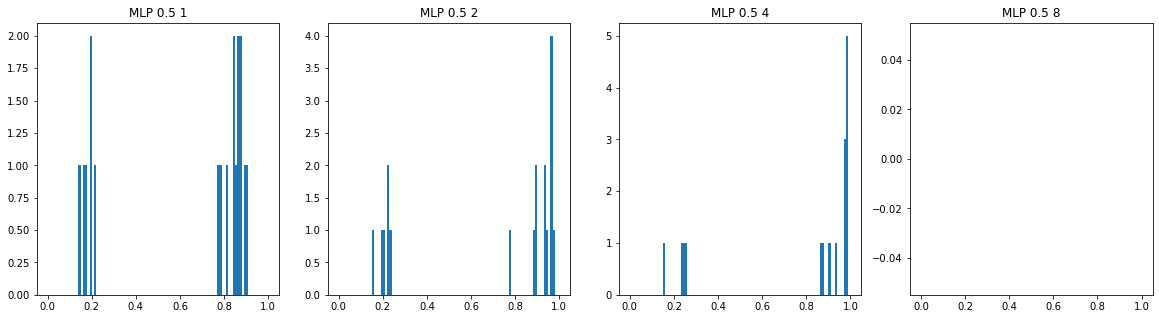

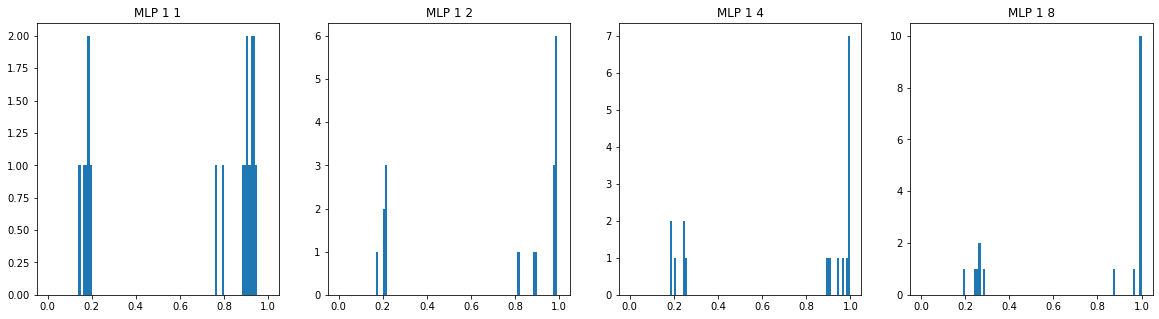

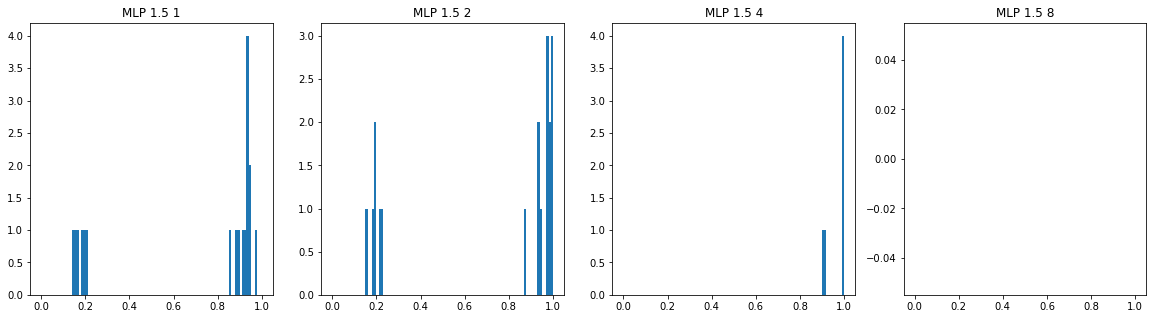

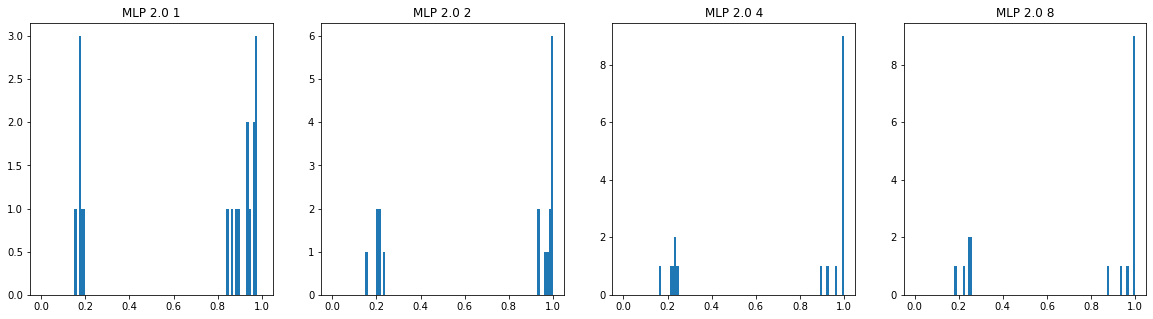

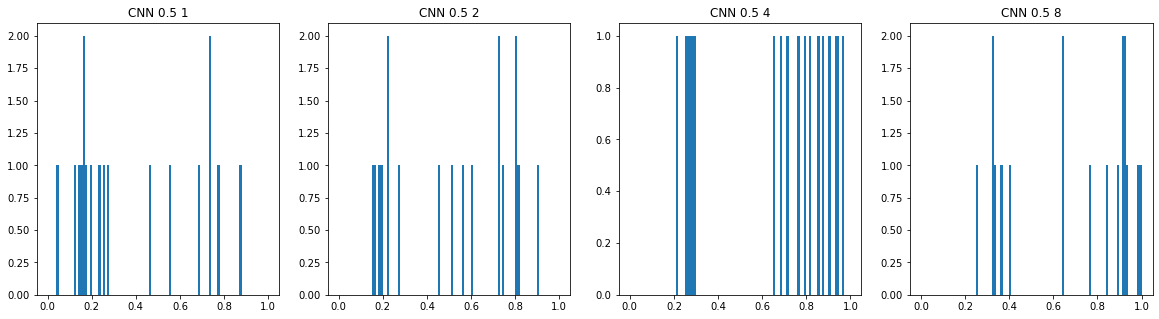

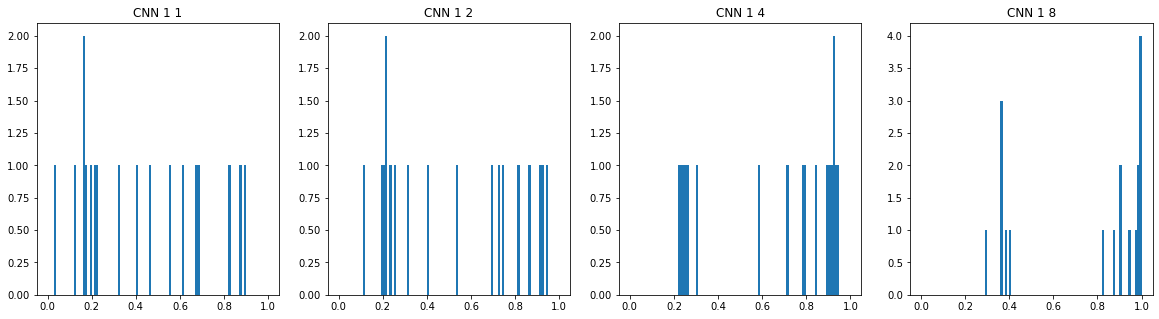

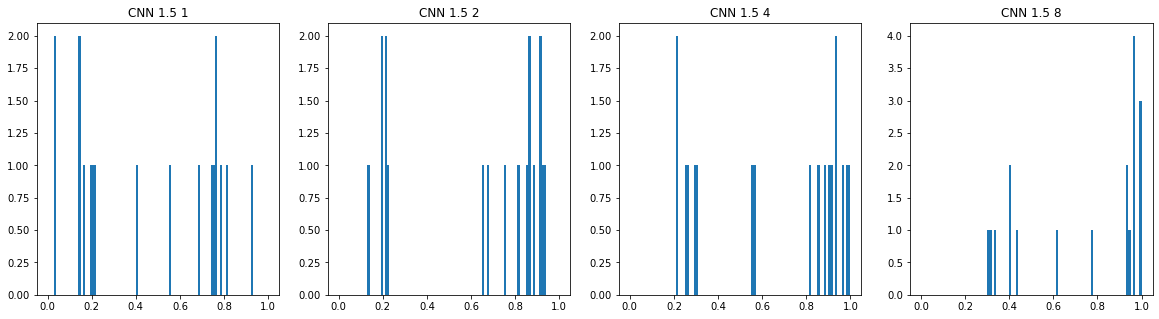

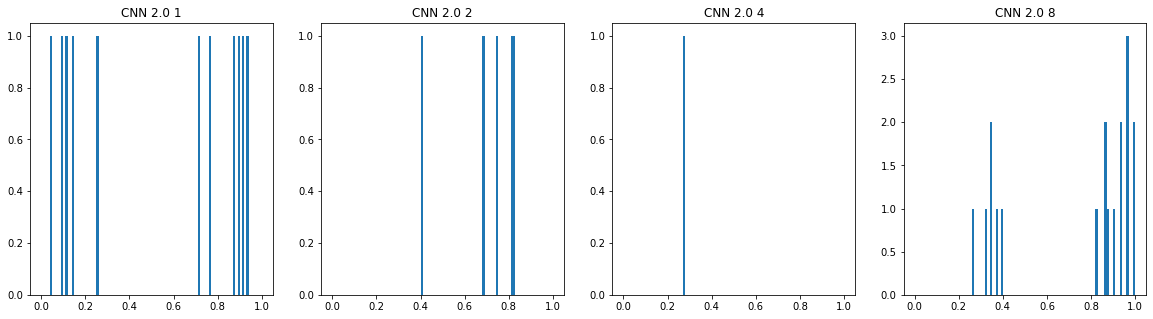

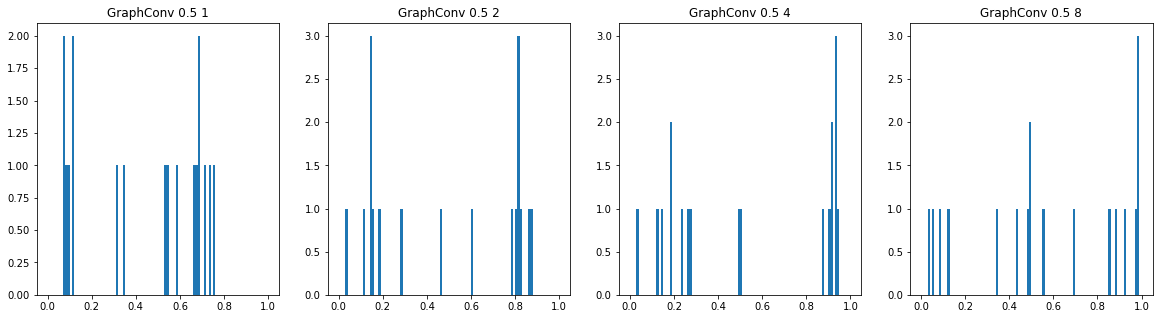

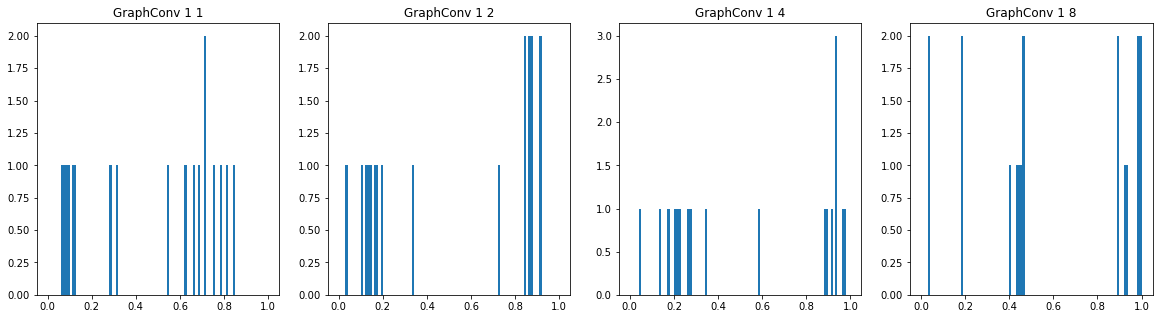

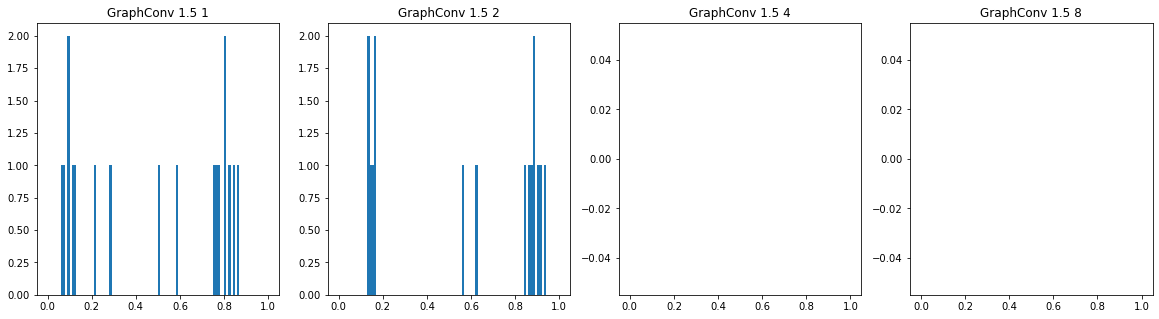

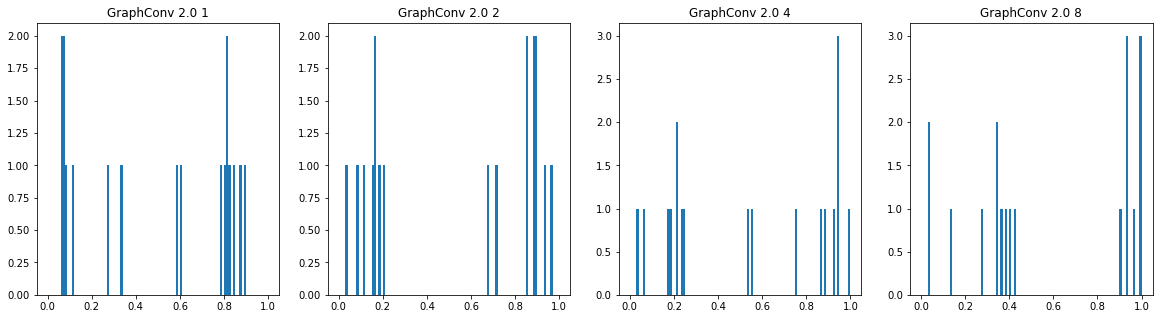

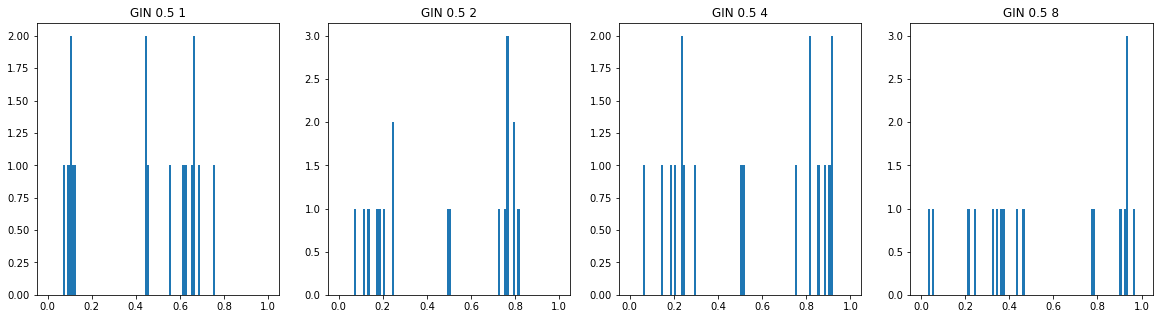

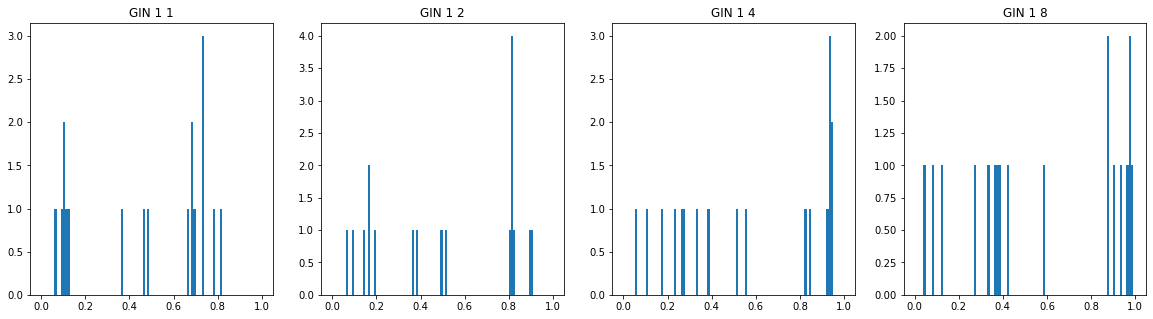

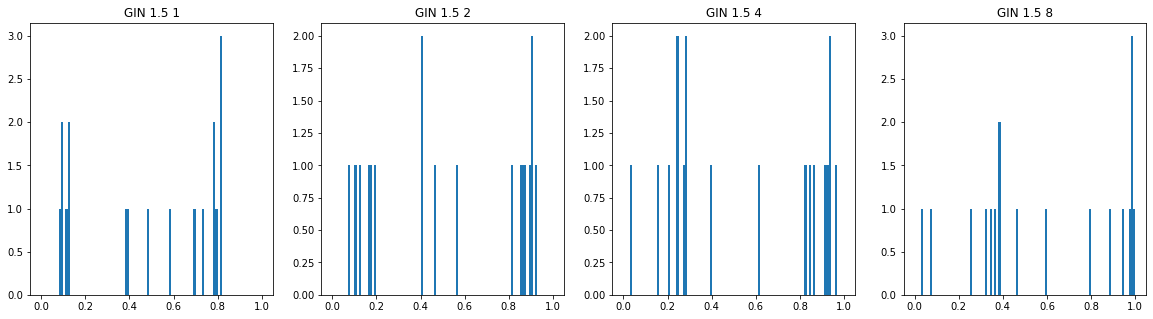

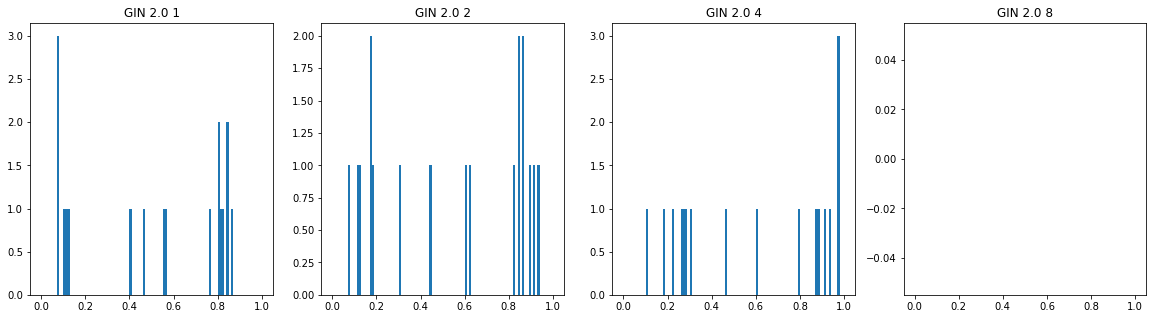

<Figure size 1440x360 with 0 Axes>

In [11]:
plt.figure(figsize=(20,5))
for model, ws in [(model,ws) for model in ['MLP','CNN','GraphConv','GIN'] for ws in [0.5, 1, 1.5, 2.0] ]:
    for i, nts in enumerate([1,2,4,8]):
        plt.subplot(1,4,i+1)
        accs = results[(results['model'] == f'\'{model}\'') & (results['number_train_samples'].astype(int)==nts) & (results['window_size'].astype(float) == ws)]['test_acc']
        accs = accs.astype(float).to_numpy()
        plt.title(f'{model} {ws} {nts}')
        plt.hist(np.round(accs,2),bins=100,range=(0,1),align='mid')
    plt.show()
    plt.figure(figsize=(20,5))

In [12]:
results[(results['test_acc'].astype(float) >.95)]['model'].value_counts()

'MLP'          92
'CNN'          28
'GraphConv'    18
'GIN'          15
Name: model, dtype: int64

In [13]:
results[(results['test_acc'].astype(float) >.95)]['eeg_feature'].value_counts()

'psd'    81
'wav'    72
Name: eeg_feature, dtype: int64

In [17]:
results[(results['test_acc'].astype(float) >.95) & (results['window_size'].astype(float) == .5 ) & (results['number_train_samples'].astype(float) == 2 ) ]

,eeg_feature,model,hidden_channels,window_size,batch_size,learning_rate,dropout_rate,weight_decay,activation_funct,number_train_samples,...,mean_val_loss,val_acc,val_f1,val_prec,val_reca,val_roc,pytorch_total_params,train_time,best_epoch,train_samples
23,'wav','MLP',2048,0.5,32,0.0005,0.25,0.0,'relu',2,...,2.5760678911209105,0.95875,0.957244037461391,0.9595758713197795,0.95875,0.9992071572580645,2903584,361.1365761756897,234,'3176/480
26,'psd','MLP',256,0.5,32,0.0005,0.25,0.0,'relu',2,...,2.5837053632736207,0.961875,0.9609513439091628,0.9625911707533622,0.961875,0.9992097782258064,76256,274.9328534603119,172,'4100/480
27,'psd','MLP',512,0.5,32,0.0005,0.25,0.0,'relu',2,...,2.584553771018982,0.959375,0.9587460216509855,0.960991165207929,0.9593749999999999,0.999530745967742,234400,167.97716450691223,91,'746/480
28,'psd','MLP',1024,0.5,32,0.0005,0.25,0.0,'relu',2,...,2.579433915615082,0.9584375,0.9557288808671158,0.961214627718959,0.9584374999999999,0.9995918346774194,796448,218.49741649627686,132,'2657/480
29,'psd','MLP',2048,0.5,32,0.0005,0.25,0.0,'relu',2,...,2.5621060705184937,0.9675,0.9668352707421812,0.9682707772340348,0.9675,0.9995336693548387,2903584,325.7848320007324,212,'4152/480


In [25]:
results[(results['test_acc'].astype(float) >.95) & (results['window_size'].astype(float) == .5 ) & (results['number_train_samples'].astype(float) == 4 ) ]

,eeg_feature,model,hidden_channels,window_size,batch_size,learning_rate,dropout_rate,weight_decay,activation_funct,number_train_samples,...,number_test_samples,mean_test_loss,test_acc,test_f1,test_prec,test_reca,test_roc,pytorch_total_params,train_time,best_epoch
306,'wav','MLP',128,0.5,16,0.005,0.25,0.04,'relu',4,...,4696,2.564684674600726,0.9544293015332198,0.9530805101383973,0.9552393327806339,0.9544293015332197,0.9987979324602084,27904,41.70087003707886,58
348,'psd','MLP',128,0.5,16,0.005,0.25,0.01,'relu',4,...,4696,2.5516246719193822,0.9670131494889267,0.9657218113577324,0.9678228991946616,0.9670131494889267,0.9991747286639923,27904,48.32375383377075,71
358,'psd','MLP',128,0.5,16,0.005,0.5,0.64,'relu',4,...,4696,2.5506084144521615,0.9678915566439523,0.9673875973623326,0.967933827326138,0.9678915566439523,0.9991080330056471,27904,72.08822059631348,127
314,'wav','CNN',128,0.5,16,0.0005,0.5,0.64,'relu',4,...,4696,2.5633625371898865,0.9580893313458262,0.95705533049592,0.9577550184191597,0.9580893313458263,0.9986059652295051,74277,140.06851291656494,261
334,'psd','CNN',64,0.5,16,0.0005,0.25,0.01,'relu',4,...,4696,2.5502032916580393,0.9714916950596252,0.9710501786605958,0.9714795236308125,0.9714916950596253,0.9991359078956071,20773,118.34072947502136,208
350,'psd','CNN',128,0.5,16,0.0005,0.5,0.01,'relu',4,...,4696,2.5661401410525255,0.958621699318569,0.957832174220672,0.958669014628408,0.958621699318569,0.9990725618903586,74277,211.6953628063202,401
337,'psd','GraphConv',64,0.5,16,0.0005,0.25,0.04,'relu',4,...,4696,2.5698598897690665,0.9522266290459966,0.9506271349047836,0.9519915620984531,0.9522266290459966,0.9987851718073255,142048,91.93662905693054,144
346,'psd','GraphConv',128,0.5,16,0.0005,0.25,0.0,'relu',4,...,4696,2.571492747589311,0.9519937180579217,0.9509937446180469,0.9553205599070742,0.9519937180579217,0.9986687449748393,562592,51.84383773803711,67


In [31]:
results[(results['test_acc'].astype(float) >.95) & (results['window_size'].astype(float) == 2 ) & (results['number_train_samples'].astype(float) == 1 ) ]

,eeg_feature,model,hidden_channels,window_size,batch_size,learning_rate,dropout_rate,weight_decay,activation_funct,number_train_samples,...,number_test_samples,mean_test_loss,test_acc,test_f1,test_prec,test_reca,test_roc,pytorch_total_params,train_time,best_epoch
1680,'psd','MLP',64,2.0,16,0.005,0.5,0.0,'relu',1,...,1099,2.5562011631539563,0.9717925386715196,0.9709127213004964,0.9728370452605195,0.9717925386715196,0.9989849004045768,11408,144.58334827423096,274
32,'wav','CNN',128,2.0,16,0.0005,0.5,0.0,'relu',1,...,1099,2.5588072679387754,0.9659918107370337,0.9615605978009882,0.9679825765425947,0.9659918107370337,0.9993122081155701,74277,175.68271660804749,339
35,'wav','CNN',128,2.0,16,0.0005,0.5,0.01,'relu',1,...,1099,2.5646522018017825,0.9618118744313012,0.9620327477253587,0.9652742794992666,0.9618118744313011,0.9990478530550495,74277,156.27012610435486,301
80,'psd','CNN',128,2.0,16,0.0005,0.5,0.01,'relu',1,...,1099,2.5704313849621845,0.9648828480436761,0.9646084126594714,0.9665392409319031,0.964882848043676,0.999238241714194,74277,124.22370767593384,237
